# Aula 3 - Pandas

Nessa aula, iremos tratar dos seguintes conteúdos:
- Pandas
- Series
- Métodos Pandas
- DataFrames
- Combinando DataFrames
- Trabalhando com CSVs
- GroupBy e Agregadores

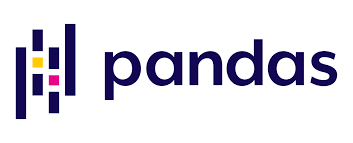

##   

## Pandas

__Pandas__ é um pacote python construído com base no __NumPy__ e __Matplotlib__ que busca organizar dados no formato de tabela, atribuindo rótulos às linhas e colunas. O pacote __Pandas__ fornece ainda um conjunto de funcionalidades que permite processar as informações de tabelas de forma bastante eficiente, implementando métodos fundamentais para fins de tratamento de dados.

O Pandas organiza os dados nos seguintes tipos de estruturas:
- Series (Séries)
- DataFrame

 O __Pandas__ é um pacote e para utilizarmos, devemos importá-lo para o nosso notebook da seguinte forma:

In [3]:
import pandas as pd
import numpy as np

##   

### Series
A estrutura de representação tipo __Series__ do __Pandas__ é semelhante a um array unidimensional, porém os elementos podem ser indexados por números inteiros (como em um array do NumPy) ou por meio de rótulos (labels) que não precisam ser únicos e podem ser organizados de forma hierárquica.
- Quando os índices ou rótulos não são informados explicitamente, Pandas cria uma indexação com números inteiros automaticamente, variando os índices de $0$ (zero) a $n-1$, onde $n$ é o número de elementos na série.
- Os rótulos são usados para realizar buscas rápidas, alinhamento de dados e operações de junção de dados.

#### Criando séries com Pandas
Séries podem ser criadas no Pandas de diferentes formas, a partir de:
- Listas ou Arrays
- Dicionários
- DataFrames

### Utilizando Listas ou Arrays

In [2]:
# Criando uma lista generica
lista = [12, 23, 44, 45, 51, 60]

In [4]:
# Definir a nossa Serie
series = pd.Series(data = lista)

In [5]:
# Mostrar a Serie
series

0    12
1    23
2    44
3    45
4    51
5    60
dtype: int64

Agora vamos criar uma Serie a partir de um __np.array__:

In [7]:
# Convertendo a lista num array
arr = np.array(lista)

# mostra o array
print(arr)

[12 23 44 45 51 60]


In [8]:
# Criando a Serie a partir do array
series2 = pd.Series(arr)

# Mostra a Serie
series2

0    12
1    23
2    44
3    45
4    51
5    60
dtype: int32

### Utilizando Dicionários

In [9]:
# Criando um dicionário
dicionario = {'a': 50,
              'b': 100,
              'c': 150,
              'd': 200}

In [10]:
print(dicionario)

{'a': 50, 'b': 100, 'c': 150, 'd': 200}


In [11]:
# Criando uma serie a partir de um dicionario
series3 = pd.Series(dicionario)

# Mostrando a Serie
series3

a     50
b    100
c    150
d    200
dtype: int64

##   

### Indexação

Assim como para os arrays, conseguimos acessar diversos elementos da __Serie__ a partir dos __índices:__

In [12]:
# Serie 1
series

0    12
1    23
2    44
3    45
4    51
5    60
dtype: int64

In [13]:
# acessando o elemento na posição 2
series[2]

44

In [14]:
# posição 0
series[0]

12

In [15]:
for i in range(0, 6):
    print(series[i])

12
23
44
45
51
60


Da mesma forma, conseguimos fazer o __Slicing__ em uma __Serie__:

In [16]:
# Slicing
series[3:]

3    45
4    51
5    60
dtype: int64

In [18]:
# Slicing 2
series[1:5]

1    23
2    44
3    45
4    51
dtype: int64

##   

### Labels

Uma característica especial das __Series__ é que podemos escolher quais os __índices__ que queremos atribuir para cada um dos elementos e acessá-los a partir da __nova identifcação__ deles:

In [19]:
# Criando uma lista de indices
labels = ['zero', 'um', 'dois', 'tres', 'quatro']

# Criando uma lista de valores
values = [1, 5, 7, 9, 14]

In [20]:
# criando a serie
series4 = pd.Series(data = values,
                    index = labels)

# Msotra a serie
series4

zero       1
um         5
dois       7
tres       9
quatro    14
dtype: int64

In [21]:
# Quero só o um e o tres
series4[['um', 'tres']]

um      5
tres    9
dtype: int64

In [22]:
# Exemplo sem o colchetes de fora
series4['um', 'tres']

KeyError: 'key of type tuple not found and not a MultiIndex'

In [37]:
# Criando uma lista de indices
labels2 = [-2, -1, 0, 1, 2]

# Criando uma lista de valores
values2 = [1, 5, 7, 9, 14]

In [38]:
# criando a serie
series5 = pd.Series(data = values2,
                    index = labels2)

# Msotra a serie
series5

-2     1
-1     5
 0     7
 1     9
 2    14
dtype: int64

In [39]:
series5[-1]

5

##   

### Operações Matemáticas

De maneira análoga ao que fizemos usando os __arrays__, pode-se fazer qualquer tipo de manipulação matemática utilizando as __Series__:

In [40]:
series3

a     50
b    100
c    150
d    200
dtype: int64

In [41]:
# Adicionar uma constante
series3 + 10

a     60
b    110
c    160
d    210
dtype: int64

In [42]:
# Dividir os elementos por uma constante
series3 / 7

a     7.142857
b    14.285714
c    21.428571
d    28.571429
dtype: float64

In [43]:
# Calculo o inverso
1/series3

a    0.020000
b    0.010000
c    0.006667
d    0.005000
dtype: float64

##   

## Métodos Pandas

Justamente pela biblioteca __Pandas__ utilizando do NumPy para a construção da sua arquitetura, muito dos métodos que são nativos do NumPy também vão funcionar com o __Pandas__, além de alguns novos métodos que veremos a seguir:

In [44]:
# Criando uma series chamada notas
notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5,
                   8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5,
                   5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])

# Mostrando o notas
notas

0     10.0
1      8.0
2      6.5
3      9.0
4      7.5
5      8.5
6      9.0
7      9.0
8      4.0
9      8.5
10     7.5
11     8.0
12    10.0
13    10.0
14     4.5
15     4.5
16     9.0
17     8.0
18     8.0
19     9.0
20     9.0
21     9.0
22     6.5
23     5.0
24     6.0
25     4.5
26     9.0
27    10.0
28     1.0
29     0.0
30     5.0
31     7.0
32     9.0
33     6.5
34     5.0
35     8.0
dtype: float64

__sort_values__: este método ordena a Serie de acordo com os valores númericos dos elementos:

In [45]:
notas.sort_values(ascending = True)

29     0.0
28     1.0
8      4.0
15     4.5
14     4.5
25     4.5
23     5.0
34     5.0
30     5.0
24     6.0
22     6.5
2      6.5
33     6.5
31     7.0
4      7.5
10     7.5
18     8.0
17     8.0
35     8.0
1      8.0
11     8.0
9      8.5
5      8.5
19     9.0
20     9.0
21     9.0
32     9.0
26     9.0
16     9.0
7      9.0
6      9.0
3      9.0
27    10.0
13    10.0
12    10.0
0     10.0
dtype: float64

__unique:__ este método retorna todos os __valores distintos__ dentro de uma __Serie__:

In [46]:
notas.unique()

array([10. ,  8. ,  6.5,  9. ,  7.5,  8.5,  4. ,  4.5,  5. ,  6. ,  1. ,
        0. ,  7. ])

__nunique:__ este método retorna a quantidade de __valores distintos__ dentro de uma __Serie__:

In [47]:
notas.nunique()

13

__value_counts:__ este método retorna as __frequências (contagens)__ para cada um dos __elementos distintos__ dentro de uma Serie:

In [48]:
notas.value_counts()

9.0     9
8.0     5
10.0    4
6.5     3
4.5     3
5.0     3
7.5     2
8.5     2
4.0     1
6.0     1
1.0     1
0.0     1
7.0     1
dtype: int64

Podemos também ao invés de retorna as frequências, retornar as __proporções__ de cada um dos __elementos distintos__:

In [49]:
notas.value_counts(normalize = True)

9.0     0.250000
8.0     0.138889
10.0    0.111111
6.5     0.083333
4.5     0.083333
5.0     0.083333
7.5     0.055556
8.5     0.055556
4.0     0.027778
6.0     0.027778
1.0     0.027778
0.0     0.027778
7.0     0.027778
dtype: float64

In [51]:
np.round(notas.value_counts(normalize = True)*100, 2)

9.0     25.00
8.0     13.89
10.0    11.11
6.5      8.33
4.5      8.33
5.0      8.33
7.5      5.56
8.5      5.56
4.0      2.78
6.0      2.78
1.0      2.78
0.0      2.78
7.0      2.78
dtype: float64

A seguir teremos alguns outros métodos já conhecidos do __NumPy__ que retorna algumas estatísticas básicas para a Serie:

In [52]:
# Soma
notas.sum()

259.0

In [53]:
# Media
notas.mean()

7.194444444444445

In [54]:
# desvio padrão
notas.std()

2.4327461783453628

__describe:__ este é um método muito útil que vai trazer um resumos das __principais estátisticas__ da Serie que estamops trabalhando:

In [57]:
notas.describe()

count    36.000000
mean      7.194444
std       2.432746
min       0.000000
25%       5.750000
50%       8.000000
75%       9.000000
max      10.000000
dtype: float64

##   

## DataFrame

__DataFrames__ assim como na mesma analogia para as matrizes, são um __conjunto de Series__ que vão ser bem caracterizados pelo o seu formato tabular (o que facilita muito o processo de manipulação dos dados!):

In [58]:
# Criando um dataframe a partir de um dicionario
dicionario2 = {'Alunos': ['Joao', 'Amanda', 'Lucia', 'Pedro'],
               'Notas': [8, 10, 6.5, 2.5]}

In [59]:
# Criando o dataframe
df = pd.DataFrame(dicionario2)

In [60]:
df

,Alunos,Notas
0,Joao,8.0
1,Amanda,10.0
2,Lucia,6.5
3,Pedro,2.5


Todo o processo que vimos sobre __indexação__ e __métodos__  para as Series são válidas também quando trabalhamos com __DataFrames:__

In [61]:
df['Alunos']

0      Joao
1    Amanda
2     Lucia
3     Pedro
Name: Alunos, dtype: object

In [62]:
df['Notas']

0     8.0
1    10.0
2     6.5
3     2.5
Name: Notas, dtype: float64

In [63]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [66]:
df.index == 1

array([False,  True, False, False])

In [64]:
df[df.index == 1]

,Alunos,Notas
1,Amanda,10.0


In [65]:
df['Notas'].mean()

6.75

In [67]:
df['Alunos'][1]

'Amanda'

__Método loc:__ Este é um método especial para quando queremos acessar os elementos de um DataFrame, onde podemos acessar utilizando apenas os índices ou mesmo passando duas posições específicas:

In [68]:
# utlizar pelo rotulo
df.loc[1]

Alunos    Amanda
Notas       10.0
Name: 1, dtype: object

In [70]:
df.loc[1, 'Notas']

10.0

In [75]:
df.loc[1:3, 'Notas']

1    10.0
2     6.5
3     2.5
Name: Notas, dtype: float64

In [76]:
# Não funciona só com a posição para as colunas
df.loc[1:3, 1]

TypeError: cannot do slice indexing on Index with these indexers [1] of type int

In [ ]:
# também existe o metodo .iloc, mas funciona 
#só para numero de posição
# e foi depreciado no Pandas

In [72]:
df.iloc[1:3, 1]

1    10.0
2     6.5
Name: Notas, dtype: float64

##   

## Máscaras Booleanas

Podemos fazer filtros no __DataFrame__ definindo como que para os arrays, as __máscaras booleanas:__

In [77]:
df

,Alunos,Notas
0,Joao,8.0
1,Amanda,10.0
2,Lucia,6.5
3,Pedro,2.5


In [78]:
df['Notas'] > 8

0    False
1     True
2    False
3    False
Name: Notas, dtype: bool

In [79]:
df[df['Notas'] > 8]

,Alunos,Notas
1,Amanda,10.0


In [80]:
df[df['Notas'] <= 8]

,Alunos,Notas
0,Joao,8.0
2,Lucia,6.5
3,Pedro,2.5


##   

## Combinando DataFrames
__Pandas__ fornece um conjunto de métodos para combinar DataFrames, o que é extremamente útil em cenários envolvendo múltiplas fontes de dados. Em particular, os métodos:
- __merge__ combina DataFrames com base nos rótulos das linhas ou valores das colunas
- __concatenate__ combina DataFrames a partir de um eixo específico

### merge
O método __merge__ "funde" dois DataFrames, duas séries, ou uma série com um DataFrame.

A fusão pode ser feita com base nos:
- valores de duas colunas específicas, uma em cada DataFrame 
- valores de uma coluna em um dos DataFrame e rótulos das linhas no outro
- valores dos rótulos das linhas em ambos os DataFrames (ou Séries)

#### Merge baseado nos valores de duas colunas

In [81]:
# Construindo dois DataFrames que serão fundidos com o método 'merge'
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 
                   'data1': range(7)})

df2 = pd.DataFrame({'key': ['a','b','d','b','d'], 
                   'data2': range(5)})

In [82]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [83]:
df2

,key,data2
0,a,0
1,b,1
2,d,2
3,b,3
4,d,4


In [84]:
# Usando a função merge
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [85]:
# Usando a função merge
pd.merge(df1, df2, on = 'key', how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,6.0,1.0
5,b,6.0,3.0
6,a,2.0,0.0
7,a,4.0,0.0
8,a,5.0,0.0
9,c,3.0,NaN


### concat
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

In [86]:
# Construindo 3 séries especificando os rótulos das linhas
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([1, 5, 6], index=['a','f', 'd']) 

In [87]:
s1

a    0
b    1
dtype: int64

In [88]:
s2

c    2
d    3
e    4
dtype: int64

In [89]:
s3

a    1
f    5
d    6
dtype: int64

In [90]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
a    1
f    5
d    6
dtype: int64

In [91]:
pd.concat([df1, df2])

,key,data1,data2
0,b,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,c,3.0,NaN
4,a,4.0,NaN
5,a,5.0,NaN
6,b,6.0,NaN
0,a,NaN,0.0
1,b,NaN,1.0
2,d,NaN,2.0


In [92]:
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0.0,NaN,1.0
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,6.0
e,NaN,4.0,NaN
f,NaN,NaN,5.0


##   

## Trabalhando com CSVs

O __Pandas__ tem algumas funcionalidades bem interessantes, como por exemplo permitir que carregue para o Notebook arquivos no formato csv, excel, xlsx e etc. Vamos ver uma aplicação como o CSV:

In [93]:
# Vamos carregar os dados do Titanic
titanic = pd.read_csv('titanic.csv')

In [94]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


[Neste Link](https://www.kaggle.com/c/titanic/data), conseguimos mais informações sobre a base de dados do Titanic! O Kaggle é uma plataforma muito conheciida no quesito de competições de Data Science e Machine Learning, além de disponibilizar diversos conjuntos de dados para treinarmos =)

Vamos testar alguns outros __métodos__ disponíveis para os DaataFrames:

In [95]:
# Dimensões do DataFrame
titanic.shape

(891, 12)

In [97]:
titanic.shape[0]

891

In [98]:
titanic.shape[1]

12

__Método head/tail:__ São métodos muito importantes que mostram na tela as primeiras e últimas linhas respectivamente de um __DataFrame__:

In [99]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [101]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [102]:
titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [103]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [104]:
titanic['Survived'].value_counts(normalize = True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

##    

## GroupBy e Agregadores

Podemos utilizar o __GroupBy__, para fsazer alguns cálculos de agrupamentos específicos (bem parecido com o que fazemos no SQL):

In [106]:
titanic['Age'].mean()

29.69911764705882

In [107]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [108]:
titanic.groupby('Sex')['Age'].agg(['mean', 'std', 'count'])

,mean,std,count
Sex,,,
female,27.915709,14.110146,261
male,30.726645,14.678201,453


Pode-se também calcular mais de uma métrica por vez utilizando o __GroupBy__ combinado com o método __agg:__

In [109]:
titanic.groupby(['Pclass','Sex'])['Age'].agg(['mean', 'std', 'count'])

mean        std  count
Pclass Sex                                
1      female  34.611765  13.612052     85
       male    41.281386  15.139570    101
2      female  28.722973  12.872702     74
       male    30.740707  14.793894     99
3      female  21.750000  12.729964    102
       male    26.507589  12.159514    253

In [110]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##   

## Exercicios

**1)** Cria uma série de pandas que tenha os números inteiros de 0 a 100. Feito isso, imprima a média e o desvio padrão.

**2)** Baixe e carregue em um pd.DataFrame o arquivo "IBOV.csv", que contém as cotações diárias do índice Ibovespa nos três primeiros trimestres de 2020.

**3)** Imprima as três primeiras linhas do DataFrame carregado e depois as três últimas.

**4)** Imprima o maior e o menor valor de fechamento do índice no período analisado.

**5)** Qual é o dia associado à 50ª linha do DataFrame?

**6)** Compare a média do valor de fechamento do índice entre o primeiro e o segundo trimestre do ano estudado. Em qual dos períodos verifica-se maior média?

**7)** Acrescente uma coluna ao DataFrame chamada 'amplitude', contendo a variação máxima diária, isto é, valor máximo - valor mínimo. Imprima a linha onde se teve a maior variação do índice e depois salve o DataFrame modificado no arquivo "BVSP_mod.csv".

##  

## Links, Artigos e Referências:

- [Documentação do Pandas](https://pandas.pydata.org/docs/), documentação onde vocês podem encontrar mais informações sobre os métodos e funções do Pandas e descobrir novos métodos que não foram apresentados no curso;
- ["10 Python Pandas Tricks that make your work more efficient",](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba) artigo escrito pelo Towards Data Science;
- ["28 useful Pandas functions you might not know"](https://paulovasconcellos.com.br/28-useful-pandas-functions-you-might-not-know-de42c59db085https://medium.com/@zachary.bedell/writing-beautiful-code-with-numpy-505f3b353174), artigo escrito por Paulo Vasconcellos para o Data Hackers;